In [1]:
import numpy as np
from imageio.v3 import imread, imwrite
import matplotlib.pyplot as plt

from pathlib import Path

from dahu import *

In [2]:
PATH = Path("./imgs")

In [3]:
img = imread(PATH / "img.png").astype(np.uint16)

In [4]:
if img.ndim == 3 and img.shape[2] == 3:
    img = ((img[..., 0] + img[..., 1] + img[..., 2]) // 3).astype(np.uint8)

In [5]:
m, M = immersion(img)

In [6]:
fg = imread(PATH / "fg.png")
bg = imread(PATH / "bg.png")

In [7]:
_, fg_K = immersion(fg)
_, bg_K = immersion(bg)

In [8]:
markers = np.zeros_like(fg)
markers[fg > 0] = 1
markers[bg > 0] = 2

In [9]:
marker_image = get_marker_image(img, markers)
_, D_fg = level_lines_distance_transform(m, M, get_coordinates(fg_K > 0))
_, D_bg = level_lines_distance_transform(m, M, get_coordinates(bg_K > 0))

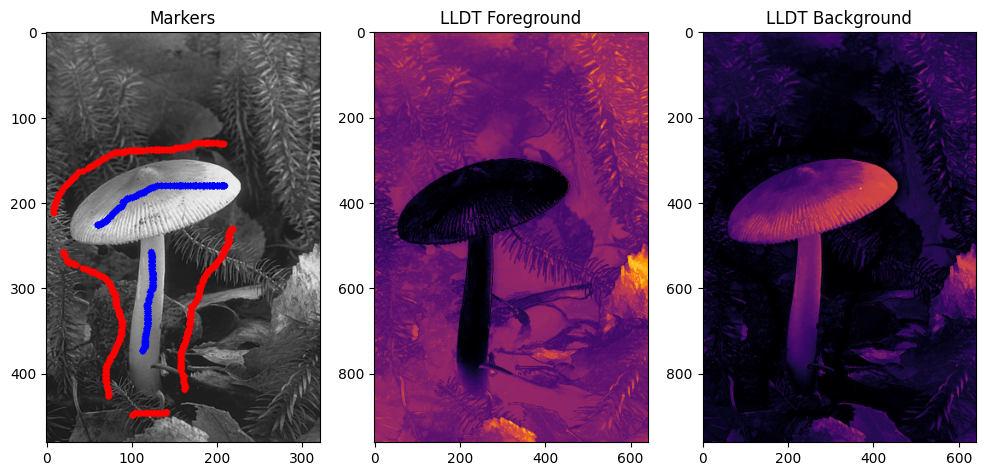

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title("Markers")
plt.imshow(marker_image)
plt.subplot(132)
plt.title("LLDT Foreground")
plt.imshow(D_fg, cmap="inferno")
plt.subplot(133)
plt.title("LLDT Background")
plt.imshow(D_bg, cmap="inferno")
plt.show()

/tmp/ipykernel_537677/1847146758.py:1: RuntimeWarning: invalid value encountered in divide
  plt.imshow(D_fg / (D_fg + D_bg), cmap="inferno_r")


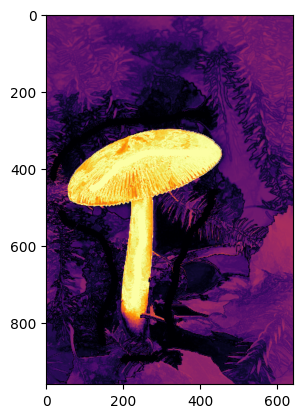

In [13]:
plt.imshow(D_fg / (D_fg + D_bg), cmap="inferno_r")

Here, the image are computed with our implementation of the generalised geodesic distance transform (available [here](https://github.com/baptisteesteban/distance_transform_benchmarks)).

In [14]:
D_fg_geos = imread("imgs/D_fg_geos.png")
D_bg_geos = imread("imgs/D_bg_geos.png")

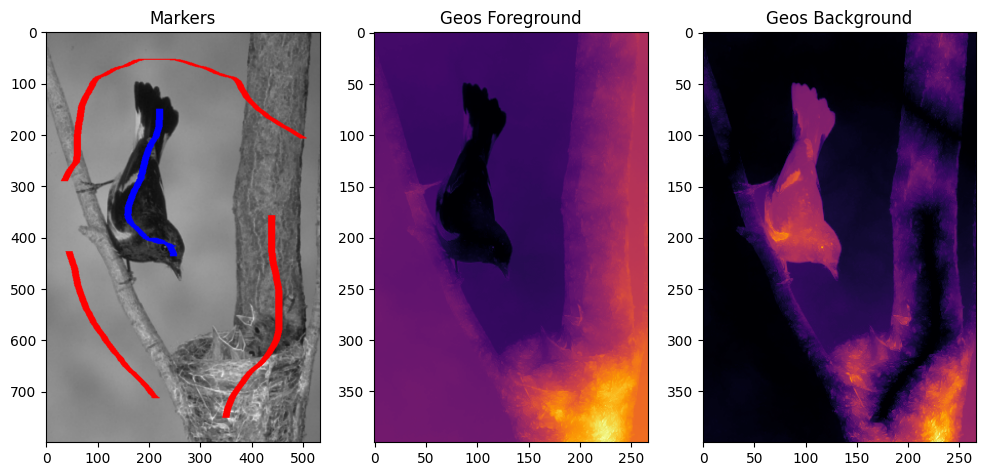

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title("Markers")
plt.imshow(marker_image)
plt.subplot(132)
plt.title("Geos Foreground")
plt.imshow(D_fg_geos)
plt.subplot(133)
plt.title("Geos Background")
plt.imshow(D_bg_geos)
plt.show()